In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import math

In [2]:
def compute_sum(n, d):
    total_sum = 0
    for w in range(1, d + 1):
        binom_n_w = math.comb(n, w)  # Compute binomial coefficient C(n, w)
        binom_d_w = math.comb(d, w)  # Compute binomial coefficient C(d, w)
        total_sum += (2 ** w) * binom_n_w * binom_d_w  # Add the term to the sum
    return total_sum

In [8]:
##### Problem
in_dim = 2
degree = 4
shape = [in_dim, compute_sum(in_dim, degree), 1]
h = [16]
Batch_size = 16

In [11]:
print(shape)

[2, 40, 1]


In [9]:
import Neural_kan
import sys
sys.path.append(r'\\hhi.de\benutzer\home\prass\Master\Code_RNN_KAN\Test_KAN_vs_NN\Neural_kan.py') 
import importlib
importlib.reload(Neural_kan)

In [10]:
import torch
import itertools

class RandomPolynomial(torch.nn.Module):
    def __init__(self, input_dim, degree):
        super(RandomPolynomial, self).__init__()
        self.input_dim = input_dim
        self.degree = degree
        self.exponents = self.generate_exponents(degree, input_dim)
        torch.manual_seed(42)
        self.coefficients = torch.randn(len(self.exponents))
        print(self.exponents)
        print(self.coefficients)

    def forward(self, X):
        batch_size = X.shape[0]
        result = torch.zeros(batch_size, 1)

        # For each monomial (term) in the polynomial, compute the corresponding product of powers of X
        for idx, exp in enumerate(self.exponents):
            term = torch.ones(batch_size, 1)
            for dim, e in enumerate(exp):
                term *= X[:, dim].pow(e).view(-1, 1)
            result += self.coefficients[idx] * term
        return result

    def generate_exponents(self, degree, input_dim):
        exponents = []
        for exp_tuple in itertools.product(range(degree + 1), repeat=input_dim):
            if sum(exp_tuple) <= degree:
                exponents.append(exp_tuple)
        return exponents
    
poly = RandomPolynomial(input_dim=in_dim, degree=degree)


In [12]:
print(f"Total number of parameters: {sum(p.numel() for p in model.parameters())}")
print(f"Total number of parameters (excluding biases): {sum(p.numel() for p in model.parameters() if p.dim() > 1)}")


Total number of parameters: 5801
Total number of parameters (excluding biases): 3840


In [31]:
from sklearn.datasets import fetch_california_housing
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

# Fetch the dataset
data = fetch_california_housing()

# Features and target
X = data.data  # Features
y = data.target  # Target (house prices)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:992)>

Epoch [1/100], Loss: 144.936880, lr: 0.001000
Epoch [2/100], Loss: 208.318272, lr: 0.001000
Epoch [3/100], Loss: 104.616926, lr: 0.001000
Epoch [4/100], Loss: 183.228676, lr: 0.001000
Epoch [5/100], Loss: 122.688974, lr: 0.001000
Epoch [6/100], Loss: 105.491764, lr: 0.001000
Epoch [7/100], Loss: 67.698431, lr: 0.001000
Epoch [8/100], Loss: 105.635017, lr: 0.001000
Epoch [9/100], Loss: 97.223781, lr: 0.001000
Epoch [10/100], Loss: 66.145813, lr: 0.001000
Epoch [11/100], Loss: 92.109028, lr: 0.001000
Epoch [12/100], Loss: 96.999554, lr: 0.001000
Epoch [13/100], Loss: 91.466055, lr: 0.001000
Epoch [14/100], Loss: 81.343834, lr: 0.001000
Epoch [15/100], Loss: 124.971022, lr: 0.001000
Epoch [16/100], Loss: 86.262271, lr: 0.001000
Epoch [17/100], Loss: 97.149000, lr: 0.001000
Epoch [18/100], Loss: 95.356830, lr: 0.001000
Epoch [19/100], Loss: 57.515808, lr: 0.001000
Epoch [20/100], Loss: 86.344176, lr: 0.001000
Epoch [21/100], Loss: 82.805927, lr: 0.001000
Epoch [22/100], Loss: 74.550132, lr

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [100/100], Loss: 22.734959, lr: 0.001000


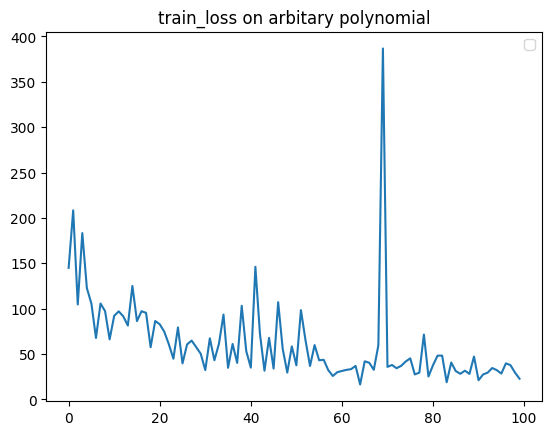

Training Complete!
Epoch [1/100], Loss: 114.020918, lr: 0.001000
Epoch [2/100], Loss: 120.266929, lr: 0.001000
Epoch [3/100], Loss: 154.278283, lr: 0.001000
Epoch [4/100], Loss: 169.178497, lr: 0.001000
Epoch [5/100], Loss: 84.493653, lr: 0.001000
Epoch [6/100], Loss: 94.960421, lr: 0.001000
Epoch [7/100], Loss: 74.167310, lr: 0.001000
Epoch [8/100], Loss: 77.989821, lr: 0.001000
Epoch [9/100], Loss: 106.782027, lr: 0.001000
Epoch [10/100], Loss: 78.231188, lr: 0.001000
Epoch [11/100], Loss: 82.204850, lr: 0.001000
Epoch [12/100], Loss: 92.413980, lr: 0.001000
Epoch [13/100], Loss: 83.941484, lr: 0.001000
Epoch [14/100], Loss: 173.089528, lr: 0.001000
Epoch [15/100], Loss: 66.383387, lr: 0.001000
Epoch [16/100], Loss: 77.695597, lr: 0.001000
Epoch [17/100], Loss: 58.781241, lr: 0.001000
Epoch [18/100], Loss: 49.298483, lr: 0.001000
Epoch [19/100], Loss: 152.481098, lr: 0.001000
Epoch [20/100], Loss: 72.087170, lr: 0.001000
Epoch [21/100], Loss: 89.364860, lr: 0.001000
Epoch [22/100], L

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [100/100], Loss: 20.606127, lr: 0.001000


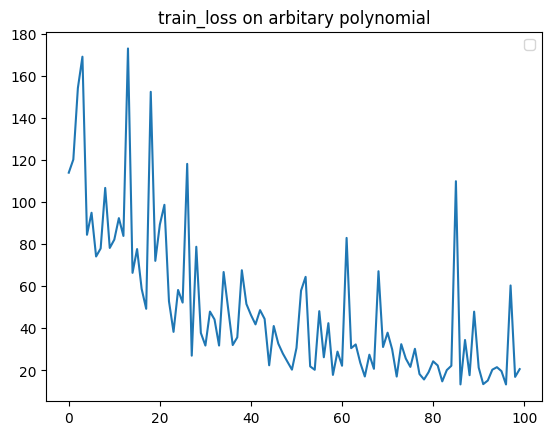

Training Complete!
Epoch [1/100], Loss: 116.739427, lr: 0.001000
Epoch [2/100], Loss: 110.136210, lr: 0.001000
Epoch [3/100], Loss: 142.591444, lr: 0.001000
Epoch [4/100], Loss: 87.270700, lr: 0.001000
Epoch [5/100], Loss: 96.581249, lr: 0.001000
Epoch [6/100], Loss: 79.264214, lr: 0.001000
Epoch [7/100], Loss: 46.725075, lr: 0.001000
Epoch [8/100], Loss: 112.867084, lr: 0.001000
Epoch [9/100], Loss: 77.258834, lr: 0.001000
Epoch [10/100], Loss: 57.430462, lr: 0.001000
Epoch [11/100], Loss: 49.932501, lr: 0.001000
Epoch [12/100], Loss: 124.627266, lr: 0.001000
Epoch [13/100], Loss: 98.324473, lr: 0.001000
Epoch [14/100], Loss: 77.721795, lr: 0.001000
Epoch [15/100], Loss: 60.840473, lr: 0.001000
Epoch [16/100], Loss: 39.649248, lr: 0.001000
Epoch [17/100], Loss: 46.469055, lr: 0.001000
Epoch [18/100], Loss: 58.752471, lr: 0.001000
Epoch [19/100], Loss: 60.977192, lr: 0.001000
Epoch [20/100], Loss: 77.224566, lr: 0.001000
Epoch [21/100], Loss: 31.587917, lr: 0.001000
Epoch [22/100], Los

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [100/100], Loss: 15.657387, lr: 0.001000


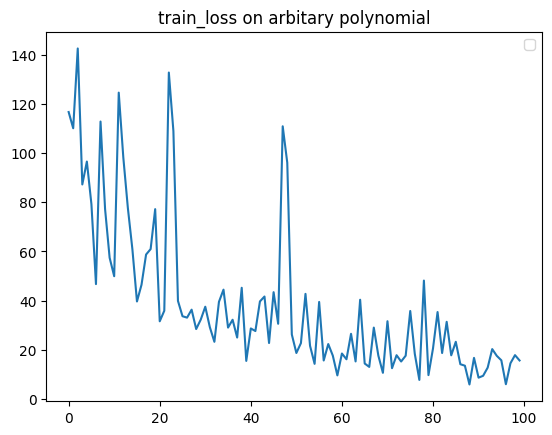

Training Complete!
Epoch [1/100], Loss: 118.426804, lr: 0.001000
Epoch [2/100], Loss: 100.456930, lr: 0.001000
Epoch [3/100], Loss: 120.909670, lr: 0.001000
Epoch [4/100], Loss: 130.924071, lr: 0.001000
Epoch [5/100], Loss: 109.342294, lr: 0.001000
Epoch [6/100], Loss: 81.100155, lr: 0.001000
Epoch [7/100], Loss: 62.789935, lr: 0.001000
Epoch [8/100], Loss: 81.048419, lr: 0.001000
Epoch [9/100], Loss: 63.948067, lr: 0.001000
Epoch [10/100], Loss: 81.588087, lr: 0.001000
Epoch [11/100], Loss: 56.060384, lr: 0.001000
Epoch [12/100], Loss: 90.815724, lr: 0.001000
Epoch [13/100], Loss: 81.674381, lr: 0.001000
Epoch [14/100], Loss: 47.507765, lr: 0.001000
Epoch [15/100], Loss: 52.581761, lr: 0.001000
Epoch [16/100], Loss: 75.385940, lr: 0.001000
Epoch [17/100], Loss: 60.320059, lr: 0.001000
Epoch [18/100], Loss: 55.195959, lr: 0.001000
Epoch [19/100], Loss: 64.146615, lr: 0.001000
Epoch [20/100], Loss: 61.683452, lr: 0.001000
Epoch [21/100], Loss: 98.829757, lr: 0.001000
Epoch [22/100], Los

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [100/100], Loss: 14.391894, lr: 0.001000


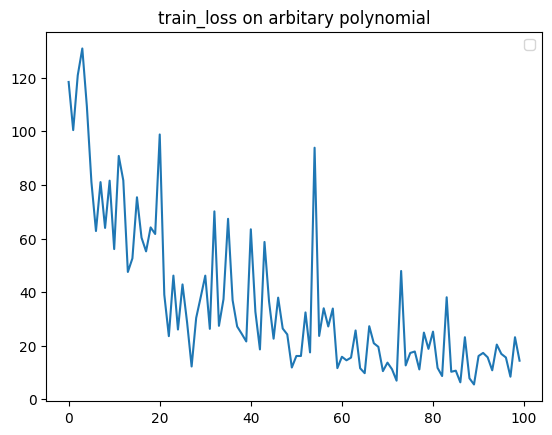

Training Complete!
Epoch [1/100], Loss: 191.530953, lr: 0.001000
Epoch [2/100], Loss: 93.640399, lr: 0.001000
Epoch [3/100], Loss: 63.814413, lr: 0.001000
Epoch [4/100], Loss: 134.291889, lr: 0.001000
Epoch [5/100], Loss: 65.551517, lr: 0.001000
Epoch [6/100], Loss: 59.483116, lr: 0.001000
Epoch [7/100], Loss: 63.157024, lr: 0.001000
Epoch [8/100], Loss: 53.498836, lr: 0.001000
Epoch [9/100], Loss: 57.389099, lr: 0.001000
Epoch [10/100], Loss: 47.566180, lr: 0.001000
Epoch [11/100], Loss: 31.626792, lr: 0.001000
Epoch [12/100], Loss: 80.342372, lr: 0.001000
Epoch [13/100], Loss: 28.805422, lr: 0.001000
Epoch [14/100], Loss: 35.944573, lr: 0.001000
Epoch [15/100], Loss: 34.980715, lr: 0.001000
Epoch [16/100], Loss: 17.328078, lr: 0.001000
Epoch [17/100], Loss: 32.943572, lr: 0.001000
Epoch [18/100], Loss: 41.365838, lr: 0.001000
Epoch [19/100], Loss: 33.463017, lr: 0.001000
Epoch [20/100], Loss: 34.049737, lr: 0.001000
Epoch [21/100], Loss: 31.119559, lr: 0.001000
Epoch [22/100], Loss: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [100/100], Loss: 10.226103, lr: 0.001000


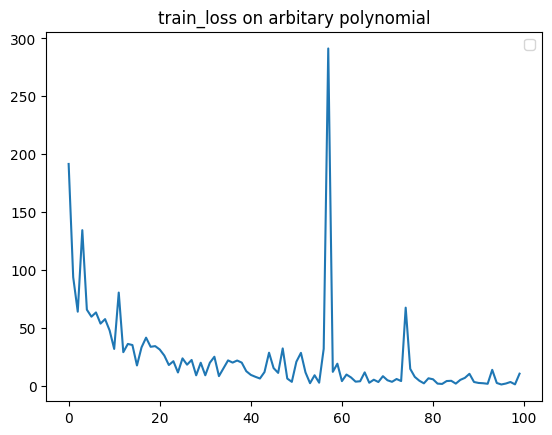

Training Complete!
Epoch [1/100], Loss: 77.709953, lr: 0.001000
Epoch [2/100], Loss: 111.429235, lr: 0.001000
Epoch [3/100], Loss: 78.946433, lr: 0.001000
Epoch [4/100], Loss: 130.017564, lr: 0.001000
Epoch [5/100], Loss: 53.975223, lr: 0.001000
Epoch [6/100], Loss: 82.293269, lr: 0.001000
Epoch [7/100], Loss: 78.112078, lr: 0.001000
Epoch [8/100], Loss: 37.529219, lr: 0.001000
Epoch [9/100], Loss: 66.699823, lr: 0.001000
Epoch [10/100], Loss: 39.576758, lr: 0.001000
Epoch [11/100], Loss: 45.283422, lr: 0.001000
Epoch [12/100], Loss: 33.880625, lr: 0.001000
Epoch [13/100], Loss: 31.165638, lr: 0.001000
Epoch [14/100], Loss: 44.597589, lr: 0.001000
Epoch [15/100], Loss: 76.830495, lr: 0.001000
Epoch [16/100], Loss: 68.578764, lr: 0.001000
Epoch [17/100], Loss: 38.167697, lr: 0.001000
Epoch [18/100], Loss: 34.123936, lr: 0.001000
Epoch [19/100], Loss: 27.673298, lr: 0.001000
Epoch [20/100], Loss: 38.779145, lr: 0.001000
Epoch [21/100], Loss: 32.169869, lr: 0.001000
Epoch [22/100], Loss: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [100/100], Loss: 2.829247, lr: 0.001000


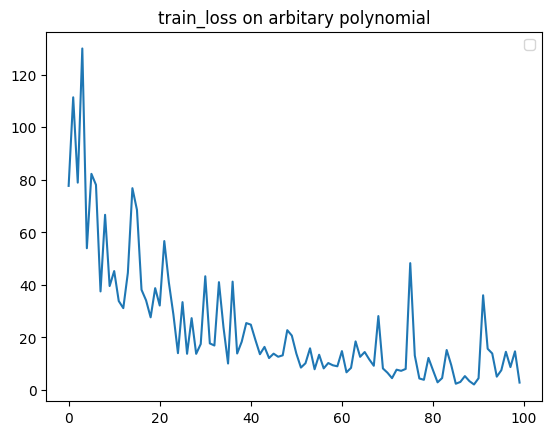

Training Complete!
Epoch [1/100], Loss: 79.535237, lr: 0.001000
Epoch [2/100], Loss: 75.126026, lr: 0.001000
Epoch [3/100], Loss: 77.724808, lr: 0.001000
Epoch [4/100], Loss: 71.425501, lr: 0.001000
Epoch [5/100], Loss: 109.144229, lr: 0.001000
Epoch [6/100], Loss: 68.390679, lr: 0.001000
Epoch [7/100], Loss: 65.936193, lr: 0.001000
Epoch [8/100], Loss: 68.902095, lr: 0.001000
Epoch [9/100], Loss: 53.898234, lr: 0.001000
Epoch [10/100], Loss: 132.181319, lr: 0.001000
Epoch [11/100], Loss: 51.467158, lr: 0.001000
Epoch [12/100], Loss: 80.301404, lr: 0.001000
Epoch [13/100], Loss: 85.817589, lr: 0.001000
Epoch [14/100], Loss: 51.998306, lr: 0.001000
Epoch [15/100], Loss: 48.361130, lr: 0.001000
Epoch [16/100], Loss: 54.042607, lr: 0.001000
Epoch [17/100], Loss: 26.413268, lr: 0.001000
Epoch [18/100], Loss: 54.946334, lr: 0.001000
Epoch [19/100], Loss: 31.665590, lr: 0.001000
Epoch [20/100], Loss: 28.576089, lr: 0.001000
Epoch [21/100], Loss: 17.698253, lr: 0.001000
Epoch [22/100], Loss: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [100/100], Loss: 2.484595, lr: 0.001000


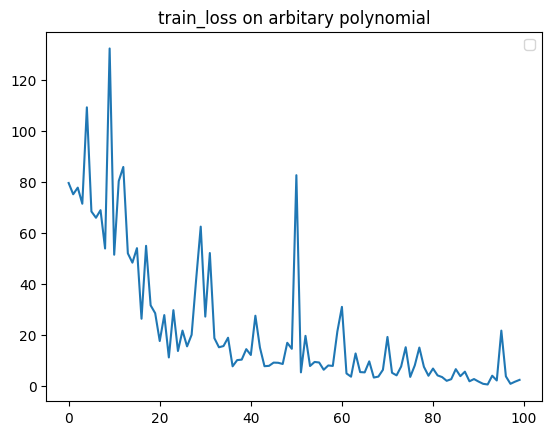

Training Complete!
Epoch [1/100], Loss: 80.550160, lr: 0.001000
Epoch [2/100], Loss: 87.640996, lr: 0.001000
Epoch [3/100], Loss: 72.666295, lr: 0.001000
Epoch [4/100], Loss: 69.340716, lr: 0.001000
Epoch [5/100], Loss: 102.700838, lr: 0.001000
Epoch [6/100], Loss: 51.391312, lr: 0.001000
Epoch [7/100], Loss: 44.522137, lr: 0.001000
Epoch [8/100], Loss: 78.669430, lr: 0.001000
Epoch [9/100], Loss: 97.908350, lr: 0.001000
Epoch [10/100], Loss: 47.963753, lr: 0.001000
Epoch [11/100], Loss: 37.968699, lr: 0.001000
Epoch [12/100], Loss: 31.015330, lr: 0.001000
Epoch [13/100], Loss: 17.668034, lr: 0.001000
Epoch [14/100], Loss: 27.949892, lr: 0.001000
Epoch [15/100], Loss: 25.451478, lr: 0.001000
Epoch [16/100], Loss: 23.555380, lr: 0.001000
Epoch [17/100], Loss: 78.842229, lr: 0.001000
Epoch [18/100], Loss: 20.836802, lr: 0.001000
Epoch [19/100], Loss: 18.799797, lr: 0.001000
Epoch [20/100], Loss: 22.990827, lr: 0.001000
Epoch [21/100], Loss: 13.455188, lr: 0.001000
Epoch [22/100], Loss: 3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [100/100], Loss: 1.388551, lr: 0.001000


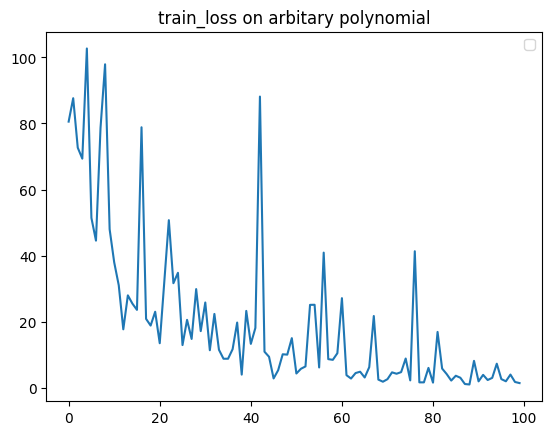

Training Complete!
Epoch [1/100], Loss: 117.644607, lr: 0.001000
Epoch [2/100], Loss: 129.668188, lr: 0.001000
Epoch [3/100], Loss: 109.119521, lr: 0.001000
Epoch [4/100], Loss: 74.642543, lr: 0.001000
Epoch [5/100], Loss: 59.213300, lr: 0.001000
Epoch [6/100], Loss: 98.567342, lr: 0.001000
Epoch [7/100], Loss: 50.944092, lr: 0.001000
Epoch [8/100], Loss: 161.796444, lr: 0.001000
Epoch [9/100], Loss: 73.598673, lr: 0.001000
Epoch [10/100], Loss: 38.872161, lr: 0.001000
Epoch [11/100], Loss: 58.461565, lr: 0.001000
Epoch [12/100], Loss: 28.400556, lr: 0.001000
Epoch [13/100], Loss: 56.280574, lr: 0.001000
Epoch [14/100], Loss: 42.662183, lr: 0.001000
Epoch [15/100], Loss: 31.124830, lr: 0.001000
Epoch [16/100], Loss: 48.776442, lr: 0.001000
Epoch [17/100], Loss: 25.492984, lr: 0.001000
Epoch [18/100], Loss: 36.358954, lr: 0.001000
Epoch [19/100], Loss: 18.359300, lr: 0.001000
Epoch [20/100], Loss: 30.297239, lr: 0.001000
Epoch [21/100], Loss: 19.163552, lr: 0.001000
Epoch [22/100], Loss

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [100/100], Loss: 6.140360, lr: 0.001000


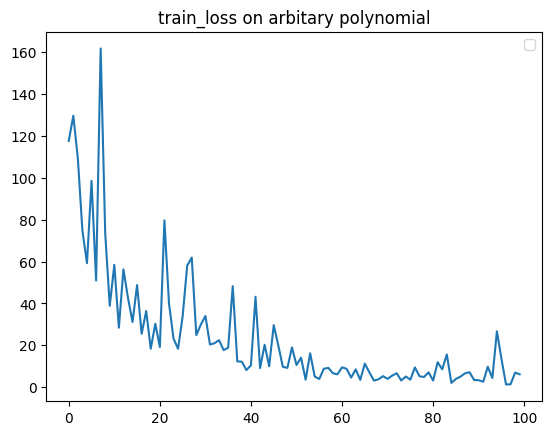

Training Complete!
Epoch [1/100], Loss: 120.766237, lr: 0.001000
Epoch [2/100], Loss: 58.002179, lr: 0.001000
Epoch [3/100], Loss: 49.285734, lr: 0.001000
Epoch [4/100], Loss: 150.238854, lr: 0.001000
Epoch [5/100], Loss: 74.132169, lr: 0.001000
Epoch [6/100], Loss: 36.408074, lr: 0.001000
Epoch [7/100], Loss: 50.373181, lr: 0.001000
Epoch [8/100], Loss: 40.257985, lr: 0.001000
Epoch [9/100], Loss: 32.976023, lr: 0.001000
Epoch [10/100], Loss: 50.832207, lr: 0.001000
Epoch [11/100], Loss: 32.599783, lr: 0.001000
Epoch [12/100], Loss: 41.555980, lr: 0.001000
Epoch [13/100], Loss: 25.422731, lr: 0.001000
Epoch [14/100], Loss: 36.637180, lr: 0.001000
Epoch [15/100], Loss: 26.995716, lr: 0.001000
Epoch [16/100], Loss: 27.803083, lr: 0.001000
Epoch [17/100], Loss: 13.849637, lr: 0.001000
Epoch [18/100], Loss: 10.849577, lr: 0.001000
Epoch [19/100], Loss: 11.034470, lr: 0.001000
Epoch [20/100], Loss: 7.559730, lr: 0.001000
Epoch [21/100], Loss: 49.873798, lr: 0.001000
Epoch [22/100], Loss: 4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [100/100], Loss: 0.744782, lr: 0.001000


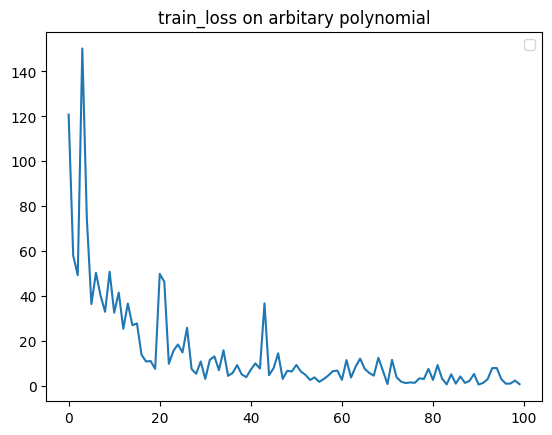

Training Complete!
Epoch [1/100], Loss: 85.126538, lr: 0.001000
Epoch [2/100], Loss: 152.299768, lr: 0.001000
Epoch [3/100], Loss: 79.251956, lr: 0.001000
Epoch [4/100], Loss: 64.812146, lr: 0.001000
Epoch [5/100], Loss: 66.143142, lr: 0.001000
Epoch [6/100], Loss: 72.541615, lr: 0.001000
Epoch [7/100], Loss: 76.405268, lr: 0.001000
Epoch [8/100], Loss: 51.437102, lr: 0.001000
Epoch [9/100], Loss: 41.935767, lr: 0.001000
Epoch [10/100], Loss: 48.326328, lr: 0.001000
Epoch [11/100], Loss: 57.541138, lr: 0.001000
Epoch [12/100], Loss: 39.475786, lr: 0.001000
Epoch [13/100], Loss: 43.535560, lr: 0.001000
Epoch [14/100], Loss: 28.567486, lr: 0.001000
Epoch [15/100], Loss: 46.084908, lr: 0.001000
Epoch [16/100], Loss: 11.659974, lr: 0.001000
Epoch [17/100], Loss: 27.990178, lr: 0.001000
Epoch [18/100], Loss: 17.673058, lr: 0.001000
Epoch [19/100], Loss: 42.905283, lr: 0.001000
Epoch [20/100], Loss: 33.499686, lr: 0.001000
Epoch [21/100], Loss: 23.927294, lr: 0.001000
Epoch [22/100], Loss: 3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [100/100], Loss: 7.315435, lr: 0.001000


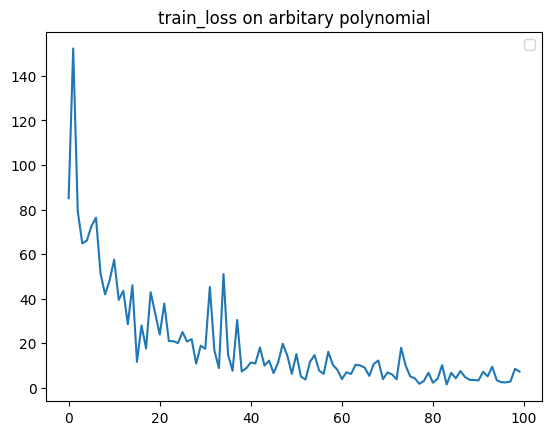

Training Complete!
Epoch [1/100], Loss: 85.333523, lr: 0.001000
Epoch [2/100], Loss: 43.571528, lr: 0.001000
Epoch [3/100], Loss: 59.448524, lr: 0.001000
Epoch [4/100], Loss: 87.021700, lr: 0.001000
Epoch [5/100], Loss: 84.565039, lr: 0.001000
Epoch [6/100], Loss: 32.947816, lr: 0.001000
Epoch [7/100], Loss: 55.103280, lr: 0.001000
Epoch [8/100], Loss: 48.529433, lr: 0.001000
Epoch [9/100], Loss: 33.592004, lr: 0.001000
Epoch [10/100], Loss: 54.746445, lr: 0.001000
Epoch [11/100], Loss: 46.347736, lr: 0.001000
Epoch [12/100], Loss: 21.817500, lr: 0.001000
Epoch [13/100], Loss: 106.234414, lr: 0.001000
Epoch [14/100], Loss: 23.120447, lr: 0.001000
Epoch [15/100], Loss: 65.493170, lr: 0.001000
Epoch [16/100], Loss: 27.569480, lr: 0.001000
Epoch [17/100], Loss: 38.849874, lr: 0.001000
Epoch [18/100], Loss: 56.944035, lr: 0.001000
Epoch [19/100], Loss: 13.728314, lr: 0.001000
Epoch [20/100], Loss: 11.273412, lr: 0.001000
Epoch [21/100], Loss: 21.689312, lr: 0.001000
Epoch [22/100], Loss: 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [100/100], Loss: 3.469332, lr: 0.001000


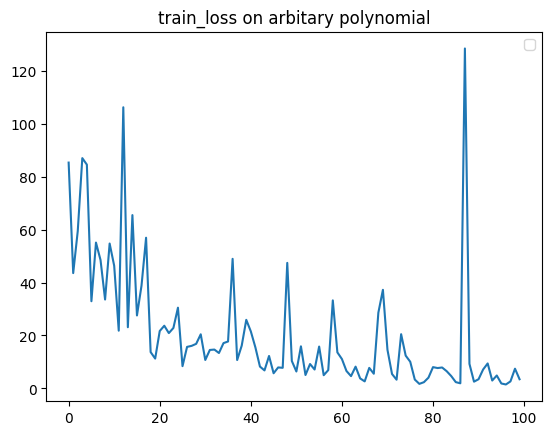

Training Complete!
Epoch [1/100], Loss: 121.824719, lr: 0.001000
Epoch [2/100], Loss: 75.797648, lr: 0.001000
Epoch [3/100], Loss: 130.645363, lr: 0.001000
Epoch [4/100], Loss: 57.707564, lr: 0.001000
Epoch [5/100], Loss: 90.412943, lr: 0.001000
Epoch [6/100], Loss: 33.761432, lr: 0.001000
Epoch [7/100], Loss: 57.093777, lr: 0.001000
Epoch [8/100], Loss: 32.579553, lr: 0.001000
Epoch [9/100], Loss: 61.870319, lr: 0.001000
Epoch [10/100], Loss: 18.523947, lr: 0.001000
Epoch [11/100], Loss: 32.932385, lr: 0.001000
Epoch [12/100], Loss: 41.809377, lr: 0.001000
Epoch [13/100], Loss: 21.080874, lr: 0.001000
Epoch [14/100], Loss: 31.798227, lr: 0.001000
Epoch [15/100], Loss: 23.315361, lr: 0.001000
Epoch [16/100], Loss: 57.870046, lr: 0.001000
Epoch [17/100], Loss: 12.677180, lr: 0.001000
Epoch [18/100], Loss: 26.052920, lr: 0.001000
Epoch [19/100], Loss: 14.424666, lr: 0.001000
Epoch [20/100], Loss: 12.268476, lr: 0.001000
Epoch [21/100], Loss: 15.470429, lr: 0.001000
Epoch [22/100], Loss: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [100/100], Loss: 11.762543, lr: 0.001000


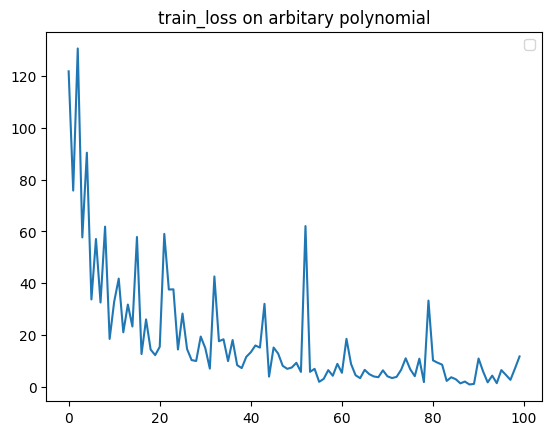

Training Complete!
Epoch [1/100], Loss: 82.130551, lr: 0.001000
Epoch [2/100], Loss: 119.191767, lr: 0.001000
Epoch [3/100], Loss: 53.869255, lr: 0.001000
Epoch [4/100], Loss: 52.004434, lr: 0.001000
Epoch [5/100], Loss: 58.277189, lr: 0.001000
Epoch [6/100], Loss: 81.204696, lr: 0.001000
Epoch [7/100], Loss: 48.704347, lr: 0.001000
Epoch [8/100], Loss: 28.019647, lr: 0.001000
Epoch [9/100], Loss: 62.732768, lr: 0.001000
Epoch [10/100], Loss: 39.265282, lr: 0.001000
Epoch [11/100], Loss: 31.434706, lr: 0.001000
Epoch [12/100], Loss: 23.309595, lr: 0.001000
Epoch [13/100], Loss: 27.574898, lr: 0.001000
Epoch [14/100], Loss: 17.623506, lr: 0.001000
Epoch [15/100], Loss: 36.874980, lr: 0.001000
Epoch [16/100], Loss: 9.745743, lr: 0.001000
Epoch [17/100], Loss: 19.820564, lr: 0.001000
Epoch [18/100], Loss: 19.742406, lr: 0.001000
Epoch [19/100], Loss: 12.700007, lr: 0.001000
Epoch [20/100], Loss: 5.304518, lr: 0.001000
Epoch [21/100], Loss: 11.149301, lr: 0.001000
Epoch [22/100], Loss: 23.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [100/100], Loss: 3.345583, lr: 0.001000


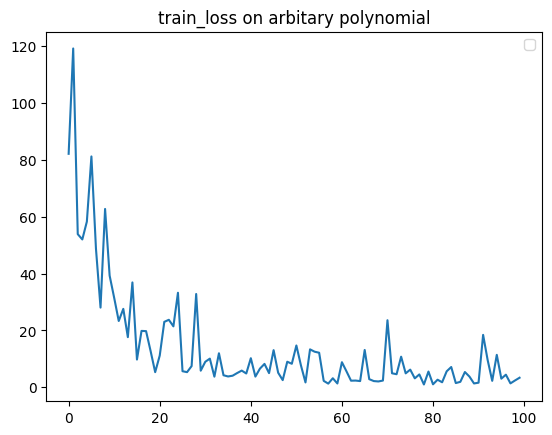

Training Complete!
Epoch [1/100], Loss: 97.732003, lr: 0.001000
Epoch [2/100], Loss: 92.989008, lr: 0.001000
Epoch [3/100], Loss: 106.377351, lr: 0.001000
Epoch [4/100], Loss: 131.679440, lr: 0.001000
Epoch [5/100], Loss: 68.216714, lr: 0.001000
Epoch [6/100], Loss: 74.620887, lr: 0.001000
Epoch [7/100], Loss: 38.305139, lr: 0.001000
Epoch [8/100], Loss: 46.994383, lr: 0.001000
Epoch [9/100], Loss: 61.583273, lr: 0.001000
Epoch [10/100], Loss: 114.206734, lr: 0.001000
Epoch [11/100], Loss: 75.797640, lr: 0.001000
Epoch [12/100], Loss: 32.989711, lr: 0.001000
Epoch [13/100], Loss: 21.466284, lr: 0.001000
Epoch [14/100], Loss: 29.151606, lr: 0.001000
Epoch [15/100], Loss: 20.200221, lr: 0.001000
Epoch [16/100], Loss: 34.955664, lr: 0.001000
Epoch [17/100], Loss: 181.692954, lr: 0.001000
Epoch [18/100], Loss: 24.105276, lr: 0.001000
Epoch [19/100], Loss: 21.600657, lr: 0.001000
Epoch [20/100], Loss: 34.065453, lr: 0.001000
Epoch [21/100], Loss: 22.014038, lr: 0.001000
Epoch [22/100], Loss

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [100/100], Loss: 4.662537, lr: 0.001000


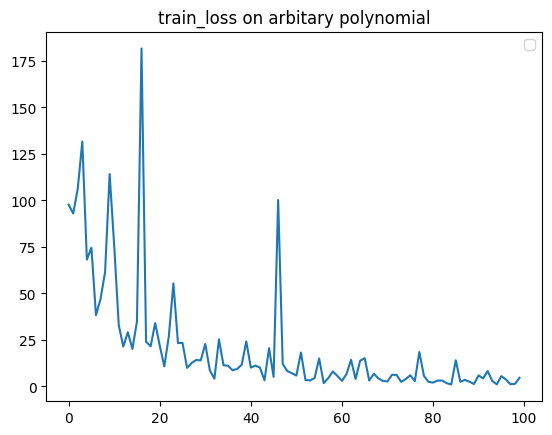

Training Complete!


In [28]:
import time
for i in range(1,16):
    model = Neural_kan.Neural_Kan(shape = shape, h = [i], device = None)
    epochs = 100
    train_loss = []
    model.train()
    optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.)
    criterion = torch.nn.MSELoss()
    for epoch in range(epochs):
        running_loss = 0.0 
        for samples in range(100):
            start_time = time.time()
            optimizer.zero_grad()
            input = torch.randn(Batch_size, in_dim)
            target = poly(input)
            outputs = model(input)
            loss = criterion(target, outputs)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / 100
        train_loss.append(avg_loss)
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.6f}, lr: {optimizer.param_groups[0]['lr']:6f}")
    plt.plot(train_loss)
    plt.title(f'train_loss on arbitary polynomial h = {i}')
    plt.legend()
    plt.show()
    print("Training Complete!")

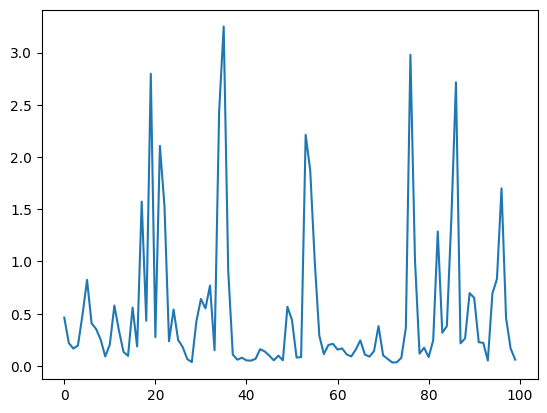

In [19]:
plt.plot(train_loss[-100:])
plt.show()

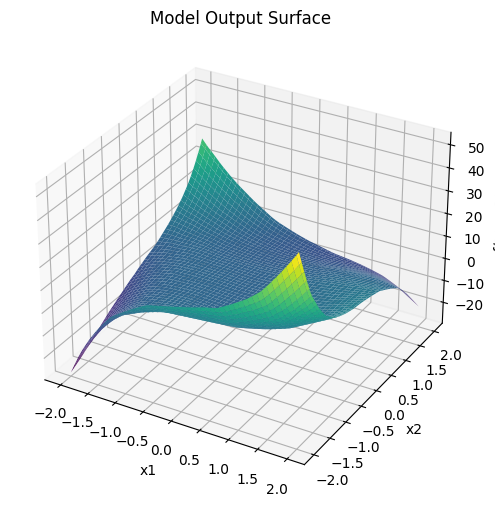

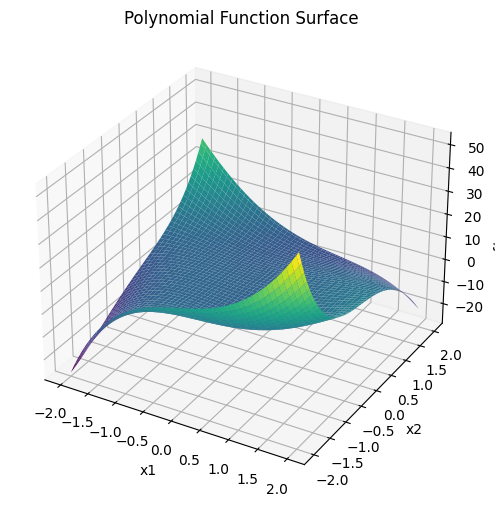

In [26]:
import torch
import matplotlib.pyplot as plt


model.eval()  # Set model to evaluation mode

# Create a grid of x1 and x2 values
x1_range = np.linspace(-2, 2, 100)
x2_range = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Flatten the grid and convert to torch tensor
X_input = torch.tensor(np.c_[X1.ravel(), X2.ravel()], dtype=torch.float32)

# Compute model output
with torch.no_grad():
    Z = model(X_input).numpy().reshape(X1.shape)

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')

# Labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Model Output Surface')

plt.show()

x1_range = np.linspace(-2, 2, 100)
x2_range = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Flatten the grid and convert to torch tensor
X_input = torch.tensor(np.c_[X1.ravel(), X2.ravel()], dtype=torch.float32)
with torch.no_grad():
    Z = poly(X_input).numpy().reshape(X1.shape)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Polynomial Function Surface')

plt.show()



In [27]:
poly.coefficients

Parameter containing:
tensor([-0.8828,  0.0232, -0.9740, -1.3008,  0.6536, -0.2738,  2.1751,  0.0991,
        -1.3011,  1.4721,  0.7255,  0.1220,  0.9422, -1.2801, -0.3082],
       requires_grad=True)